## Data loading

### Subtask:
Load the data from "data-historycal-layer-1.csv" into a dataframe.


**Reasoning**:
Import pandas and load the data into a DataFrame.



In [11]:
import pandas as pd

df_data_historycal_layer_1 = pd.read_csv('data-historycal-layer-1.csv')

**Reasoning**:
The data has been loaded. Display the first few rows to verify.



In [12]:
df_data_historycal_layer_1.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock_Splits,Symbol,Crypto,Crypto_Name,Crypto_Code
0,2017-11-09 00:00:00+00:00,0.025160,0.035060,0.025006,0.032053,18716200,0.0,0.0,ADA-USD,ADA,Cardano,ADA
1,2017-11-10 00:00:00+00:00,0.032219,0.033348,0.026451,0.027119,6766780,0.0,0.0,ADA-USD,ADA,Cardano,ADA
2,2017-11-11 00:00:00+00:00,0.026891,0.029659,0.025684,0.027437,5532220,0.0,0.0,ADA-USD,ADA,Cardano,ADA
3,2017-11-12 00:00:00+00:00,0.027480,0.027952,0.022591,0.023977,7280250,0.0,0.0,ADA-USD,ADA,Cardano,ADA
4,2017-11-13 00:00:00+00:00,0.024364,0.026300,0.023495,0.025808,4419440,0.0,0.0,ADA-USD,ADA,Cardano,ADA


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, columns, data types, and basic statistics.


**Reasoning**:
Print the column names and their data types, display the shape of the dataframe, generate descriptive statistics for numerical columns, and check for missing values.



In [13]:
print("Column Names and Data Types:")
print(df_data_historycal_layer_1.info())

print("\nShape of the DataFrame:")
print(df_data_historycal_layer_1.shape)

print("\nDescriptive Statistics for Numerical Columns:")
print(df_data_historycal_layer_1.describe())

print("\nMissing Values per Column:")
print(df_data_historycal_layer_1.isnull().sum())

Column Names and Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28140 entries, 0 to 28139
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          28140 non-null  object 
 1   Open          28140 non-null  float64
 2   High          28140 non-null  float64
 3   Low           28140 non-null  float64
 4   Close         28140 non-null  float64
 5   Volume        28140 non-null  int64  
 6   Dividends     28140 non-null  float64
 7   Stock_Splits  28140 non-null  float64
 8   Symbol        28140 non-null  object 
 9   Crypto        28140 non-null  object 
 10  Crypto_Name   28140 non-null  object 
 11  Crypto_Code   28140 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 2.6+ MB
None

Shape of the DataFrame:
(28140, 12)

Descriptive Statistics for Numerical Columns:
                Open           High            Low          Close  \
count   28140.000000   28140.000000   28

## Data cleaning

### Subtask:
Handle any inconsistencies in the data that might affect the analysis, specifically focusing on the 'Date' column to ensure it is in a proper datetime format.


**Reasoning**:
Convert the 'Date' column to datetime objects and then check the data types to confirm the conversion.



In [14]:
df_data_historycal_layer_1['Date'] = pd.to_datetime(df_data_historycal_layer_1['Date'])
print(df_data_historycal_layer_1.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28140 entries, 0 to 28139
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype              
---  ------        --------------  -----              
 0   Date          28140 non-null  datetime64[ns, UTC]
 1   Open          28140 non-null  float64            
 2   High          28140 non-null  float64            
 3   Low           28140 non-null  float64            
 4   Close         28140 non-null  float64            
 5   Volume        28140 non-null  int64              
 6   Dividends     28140 non-null  float64            
 7   Stock_Splits  28140 non-null  float64            
 8   Symbol        28140 non-null  object             
 9   Crypto        28140 non-null  object             
 10  Crypto_Name   28140 non-null  object             
 11  Crypto_Code   28140 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(6), int64(1), object(4)
memory usage: 2.6+ MB
None


## Data analysis

### Subtask:
Perform initial data analysis to identify trends, patterns, and potential features relevant to forecasting. This includes analyzing price movements, volume changes, and potential correlations between different columns.


**Reasoning**:
Calculate the daily price change and percentage price change, analyze the distribution of 'Volume', and calculate the correlation matrix for relevant numerical columns to fulfill the subtask requirements for initial data analysis.



In [15]:
# 1. Calculate the daily price change
df_data_historycal_layer_1['Price_Change'] = df_data_historycal_layer_1['Close'] - df_data_historycal_layer_1['Open']

# 2. Calculate the daily percentage price change
# Handle potential division by zero if 'Open' is 0
df_data_historycal_layer_1['Percentage_Price_Change'] = (
    (df_data_historycal_layer_1['Close'] - df_data_historycal_layer_1['Open']) /
    df_data_historycal_layer_1['Open'].replace(0, pd.NA) * 100
)

# 3. Analyze the distribution of 'Volume'
print("Volume Distribution Analysis:")
print(df_data_historycal_layer_1['Volume'].describe())

# 4. Calculate the correlation matrix
numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Change', 'Percentage_Price_Change']
correlation_matrix = df_data_historycal_layer_1[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

Volume Distribution Analysis:
count    2.814000e+04
mean     5.114095e+09
std      1.117132e+10
min      9.284000e+03
25%      2.481935e+08
50%      9.675281e+08
75%      3.568044e+09
max      3.509679e+11
Name: Volume, dtype: float64

Correlation Matrix:
                             Open      High       Low     Close    Volume  \
Open                     1.000000  0.999771  0.999680  0.999523  0.703441   
High                     0.999771  1.000000  0.999592  0.999795  0.707145   
Low                      0.999680  0.999592  1.000000  0.999742  0.698077   
Close                    0.999523  0.999795  0.999742  1.000000  0.703317   
Volume                   0.703441  0.707145  0.698077  0.703317  1.000000   
Price_Change             0.020869  0.037086  0.038313  0.051742  0.021548   
Percentage_Price_Change -0.006857 -0.003844 -0.003679 -0.001208  0.008448   

                         Price_Change  Percentage_Price_Change  
Open                         0.020869                -0.006857

## Data visualization

### Subtask:
Create visualizations to highlight key findings from the data analysis and gain further insights. This includes visualizing price trends, volume distribution, and potentially the calculated price changes.


**Reasoning**:
Import necessary libraries for plotting.



In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")

**Reasoning**:
Create a time series plot of the 'Close' price over time and a time series plot of the price changes over time.



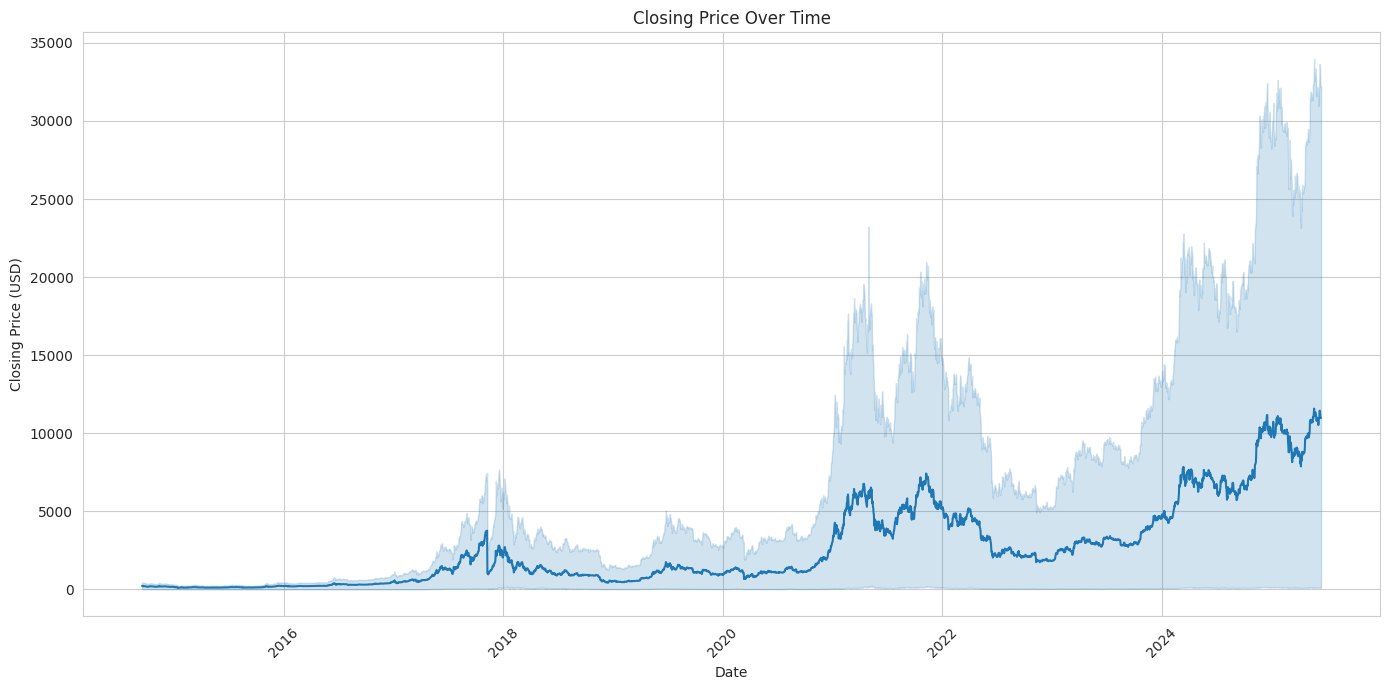

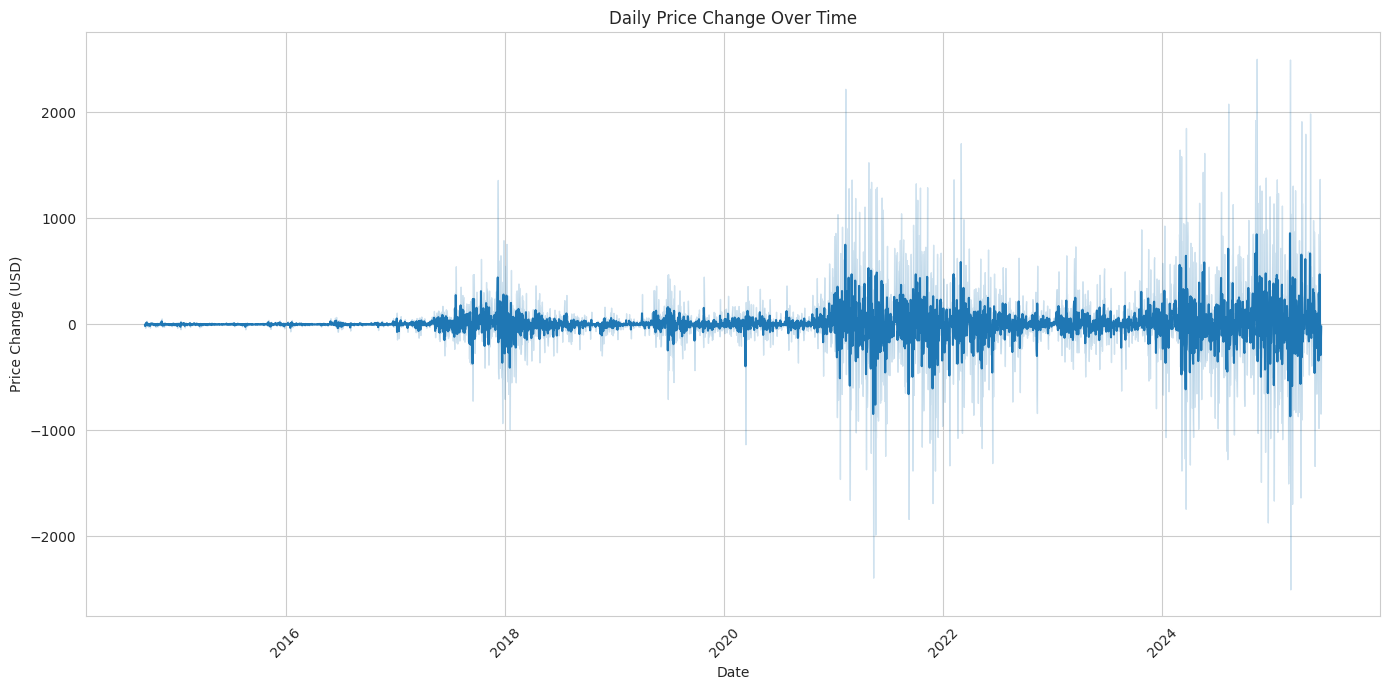

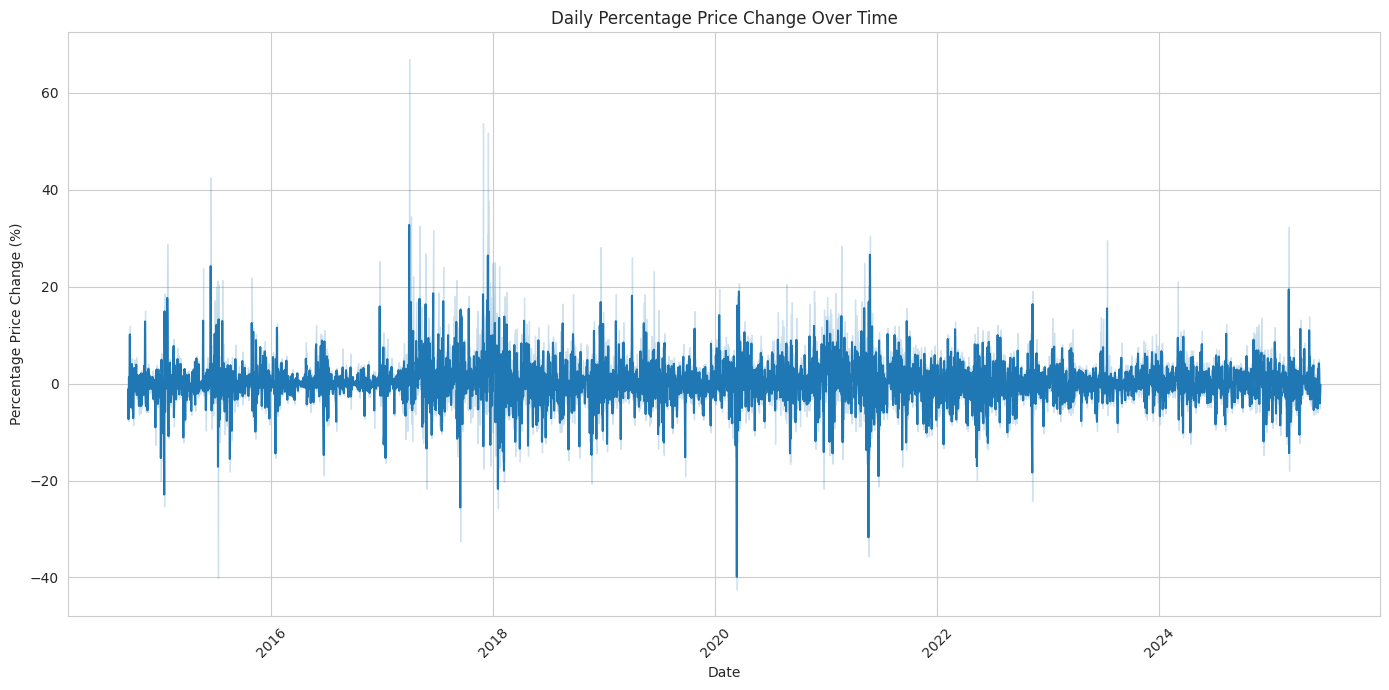

In [17]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=df_data_historycal_layer_1, x='Date', y='Close')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_data_historycal_layer_1, x='Date', y='Price_Change')
plt.title('Daily Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Price Change (USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=df_data_historycal_layer_1, x='Date', y='Percentage_Price_Change')
plt.title('Daily Percentage Price Change Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Price Change (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Reasoning**:
Plot a distribution of the 'Volume' column and a heatmap of the correlation matrix.



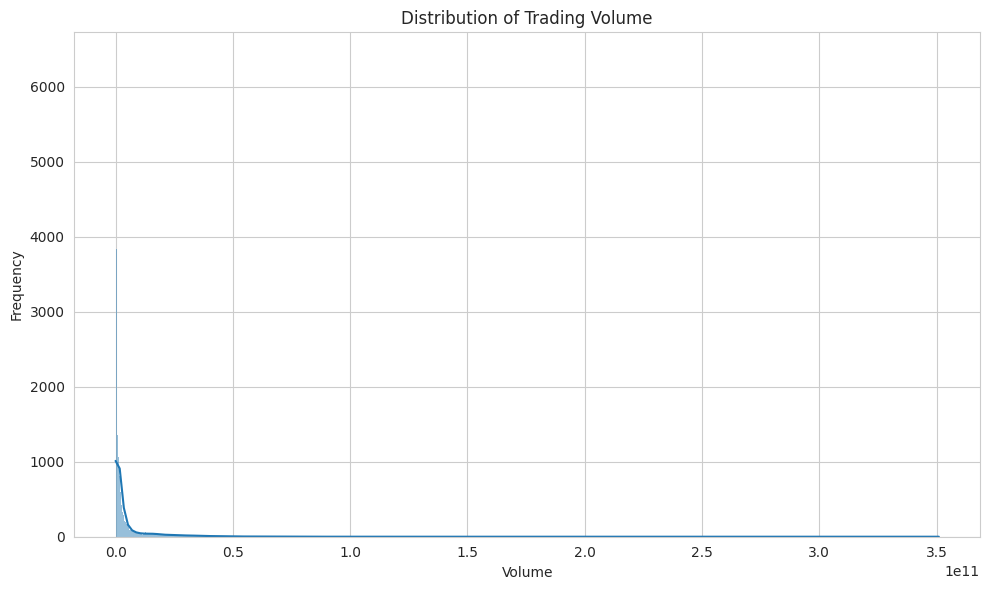

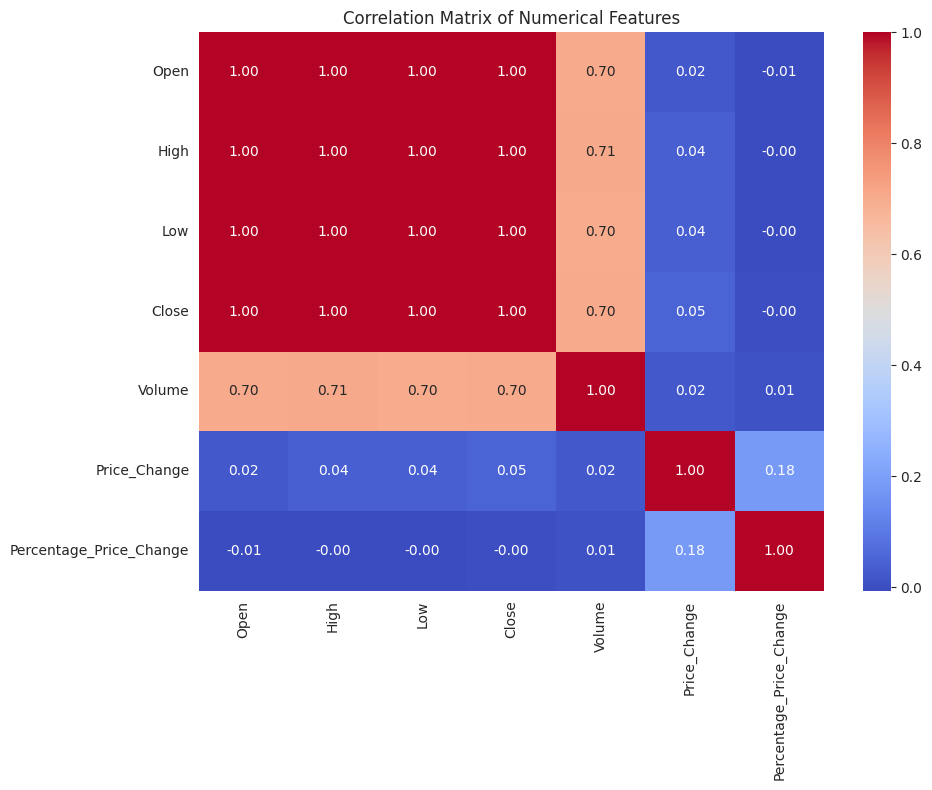

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df_data_historycal_layer_1, x='Volume', kde=True)
plt.title('Distribution of Trading Volume')
plt.xlabel('Volume')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

numerical_cols = ['Open', 'High', 'Low', 'Close', 'Volume', 'Price_Change', 'Percentage_Price_Change']
correlation_matrix = df_data_historycal_layer_1[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

In [19]:
# Filter data untuk simbol BTC-USD
btc_df = df_data_historycal_layer_1[df_data_historycal_layer_1['Symbol'] == 'BTC-USD'].copy()

# Pilih kolom yang diinginkan
btc_df = btc_df[['Date', 'Open', 'High', 'Low', 'Close']]

# Format kolom 'Date'
btc_df['Date'] = btc_df['Date'].dt.strftime('%Y-%m-%d')
btc_df.to_csv('layer-1-btc.csv', index=False)

print("Data BTC telah difilter, diformat, dan disimpan ke 'layer-1-btc.csv'")

Data BTC telah difilter, diformat, dan disimpan ke 'layer-1-btc.csv'


In [20]:
df_btc = pd.read_csv('/content/layer-1-btc.csv')
df_btc.head()

,Date,Open,High,Low,Close
0,2014-09-17,465.864014,468.174011,452.421997,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014


In [21]:
df_btc.tail()

,Date,Open,High,Low,Close
3918,2025-06-09,105793.023438,110561.421875,105400.234375,110294.101562
3919,2025-06-10,110295.687500,110380.125000,108367.710938,110257.234375
3920,2025-06-11,110261.796875,110384.218750,108086.328125,108686.625000
3921,2025-06-12,108685.914062,108780.695312,105785.687500,105929.054688
3922,2025-06-14,106109.468750,106109.468750,105938.718750,105938.718750


In [24]:
!pip install cufflinks

In [25]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings .filterwarnings ('ignore')

import plotly.graph_objs as go
import plotly.express as px

from plotly.offline import download_plotlyjs,iplot,plot,init_notebook_mode

import plotly.graph_objs as go
import plotly.express as px
import plotly as py
import cufflinks as cf
from plotly.offline import download_plotlyjs,iplot,plot,init_notebook_mode

init_notebook_mode(connected=True)

In [26]:
df_btc.shape

(3923, 5)

In [28]:
# check the data type

df_btc.dtypes

,0
Date,object
Open,float64
High,float64
Low,float64
Close,float64


In [30]:
# Check the the information about the data

df_btc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3923 entries, 0 to 3922
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    3923 non-null   object 
 1   Open    3923 non-null   float64
 2   High    3923 non-null   float64
 3   Low     3923 non-null   float64
 4   Close   3923 non-null   float64
dtypes: float64(4), object(1)
memory usage: 153.4+ KB


In [31]:
# findout the five piont summary

df_btc.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Open,3923.0,22715.868102,26441.668340,176.897003,2060.555054,9863.894531,36905.851562,111679.359375
High,3923.0,23208.272574,26970.722652,211.731003,2245.669922,10129.435547,37878.398438,111970.171875
Low,3923.0,22200.778327,25890.360099,171.509995,2004.140015,9632.382812,35631.417969,109285.070312
Close,3923.0,22741.551197,26471.188856,178.102997,2120.265015,9870.094727,36953.494141,111673.281250


# Doing Data Pre-processing !

In [33]:
df_btc.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [35]:
# get minimum  value

df_btc['Date'].min()

'2014-09-17'

In [36]:
# get maxmium value


df_btc['Date'].max()

'2025-06-14'

all data collected from 2014-09-17 and 2025-06-14

In [37]:
type(df_btc['Date'][0])

str

In [38]:
# checking  missing values

df_btc.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0


In [40]:
# checking  percentage of missing values



df_btc.isnull().sum()/df_btc.shape[0]

,0
Date,0.0
Open,0.0
High,0.0
Low,0.0
Close,0.0


In [41]:
# checking the duplicated values

df_btc.duplicated().sum()

np.int64(0)

In [42]:
# checking the percentage of   duplicated values

df_btc.duplicated().sum()/df_btc.shape[0]

np.float64(0.0)

In [43]:
df_btc.head()

,Date,Open,High,Low,Close
0,2014-09-17,465.864014,468.174011,452.421997,457.334015
1,2014-09-18,456.859985,456.859985,413.104004,424.440002
2,2014-09-19,424.102997,427.834991,384.532013,394.795990
3,2014-09-20,394.673004,423.295990,389.882996,408.903992
4,2014-09-21,408.084991,412.425995,393.181000,398.821014


# Analysing change in price of the stock overtime?

In [50]:
import matplotlib.dates as mdates

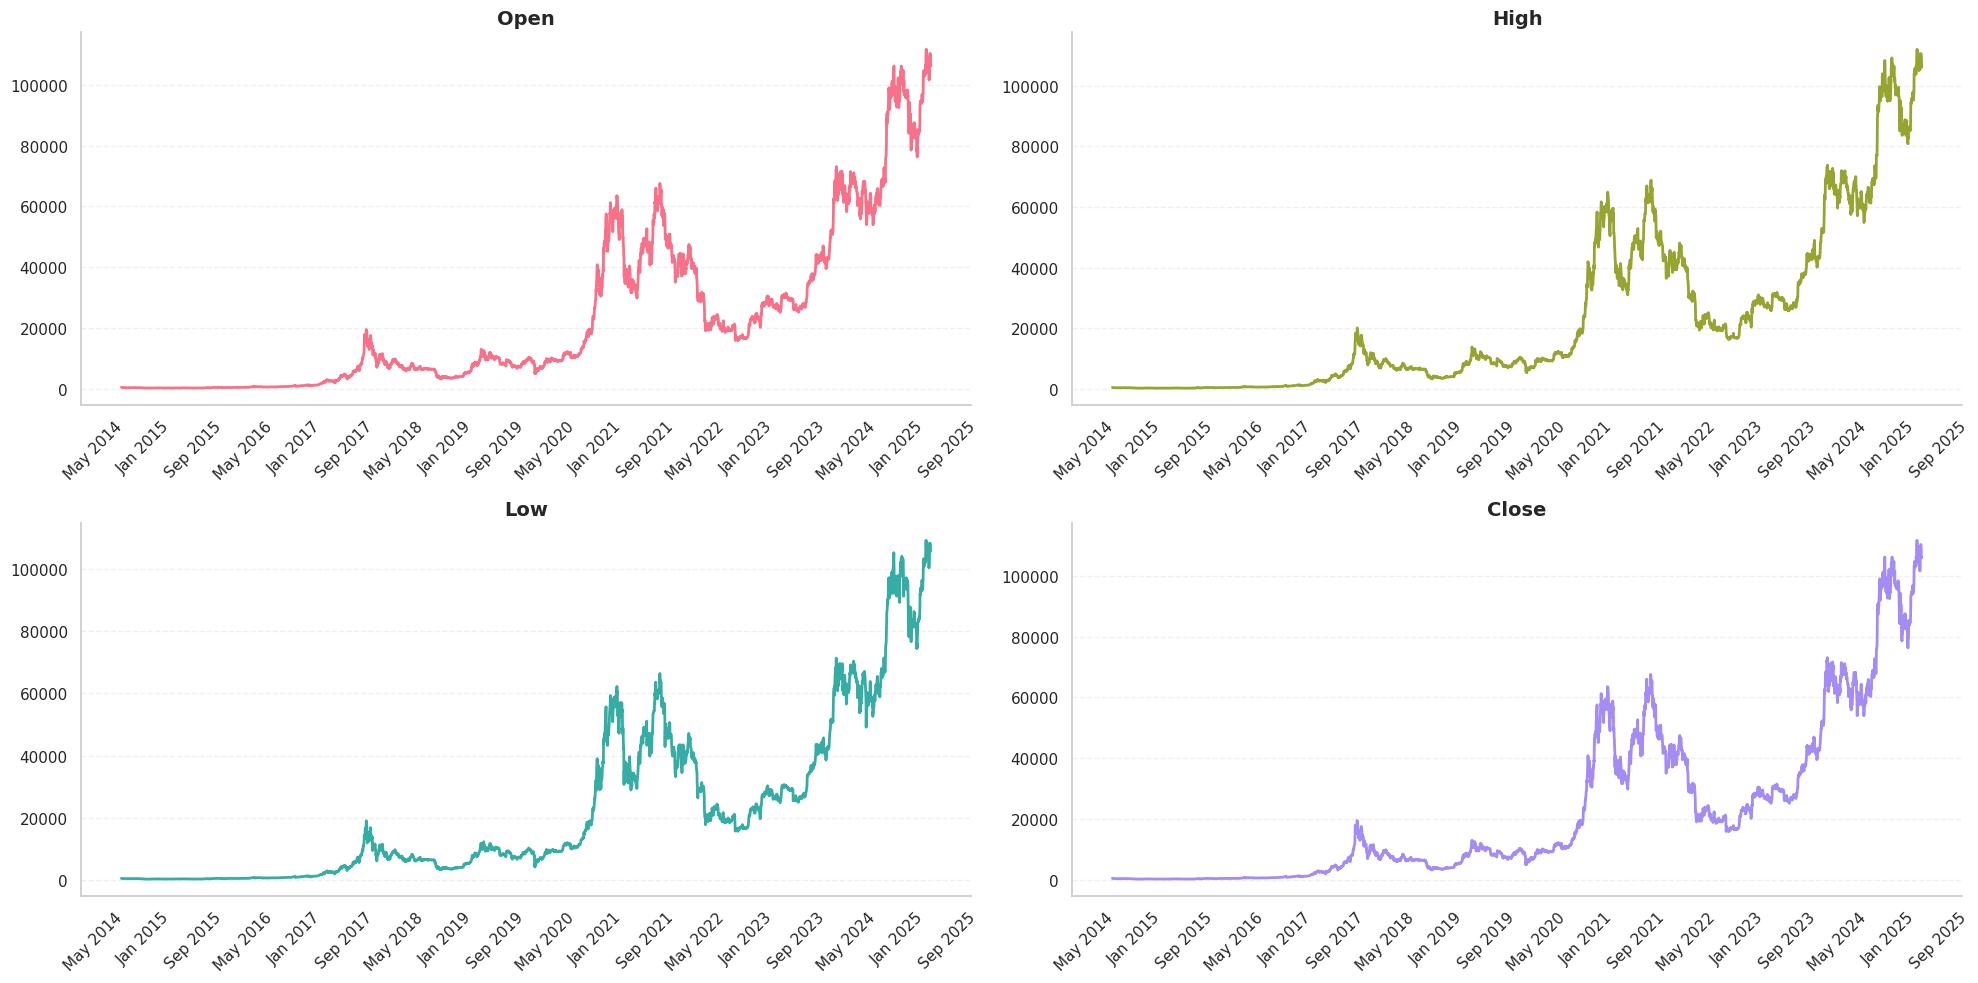

In [53]:
sns.set_theme(style="whitegrid")
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["axes.facecolor"] = "white"

df_btc['Date'] = pd.to_datetime(df_btc['Date'])
colors = sns.color_palette("husl", 4)

plt.figure(figsize=(20, 10))

for index, col in enumerate(['Open', 'High', 'Low', 'Close'], 1):
    ax = plt.subplot(2, 2, index)
    ax.plot(df_btc['Date'], df_btc[col], color=colors[index - 1], linewidth=2)
    ax.set_title(col, fontsize=14, fontweight='bold')

    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=8))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))
    ax.tick_params(axis='x', rotation=45)
    ax.grid(True, axis='y', linestyle='--', alpha=0.3)
    ax.grid(False, axis='x')
    sns.despine()

plt.tight_layout()
plt.show()

## EDA Analysis on yearly ,monthly,Quarterly bases

In [55]:
# EDA Analysis on yearly average  changes in closing price

df_btc = df_btc.set_index('Date')

# Sekarang Anda bisa menggunakan resample
yearly_average_close = df_btc['Close'].resample('Y').mean()

print("Rata-rata harga penutupan per tahun:")
print(yearly_average_close)

Rata-rata harga penutupan per tahun:
Date
2014-12-31      363.693085
2015-12-31      272.453381
2016-12-31      568.492407
2017-12-31     4006.033629
2018-12-31     7572.298947
2019-12-31     7395.246282
2020-12-31    11116.378092
2021-12-31    47436.932021
2022-12-31    28197.754099
2023-12-31    28859.448250
2024-12-31    65964.115106
2025-12-31    95072.343512
Freq: YE-DEC, Name: Close, dtype: float64


Text(0.5, 1.0, "Yearly  Average Change's in Closing Prices ")

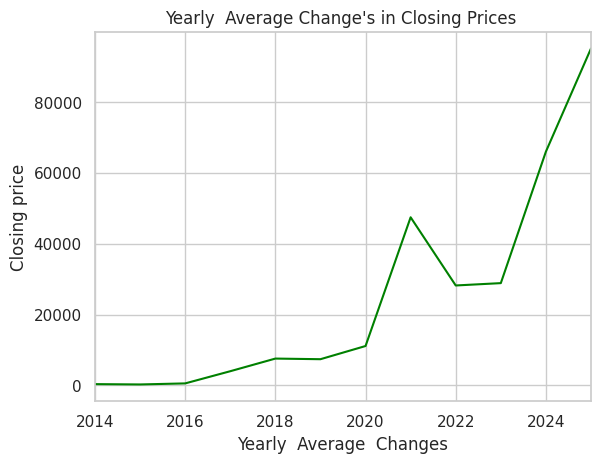

In [57]:
# EDA Analysis on yearly average  changes in closing price in Graph


df_btc['Close'].resample('Y').mean().plot(color='Green')
plt.xlabel("Yearly  Average  Changes")
plt.ylabel("Closing price")
plt.title("Yearly  Average Change's in Closing Prices ")

## EDA Analysis on Quaterly average changes in closing price in Graph

In [59]:
# EDA Analysis on Quaterly  chaverageanges in closing price

df_btc['Close'].resample("Q").mean()

,Close
Date,
2014-09-30,407.182428
2014-12-31,357.075141
2015-03-31,251.209678
2015-06-30,236.858308
2015-09-30,254.859673
2015-12-31,346.037141
2016-03-31,410.728769
2016-06-30,512.492754
2016-09-30,615.702601


Text(0.5, 1.0, 'Quaterly  Average Changes in Closing Price')

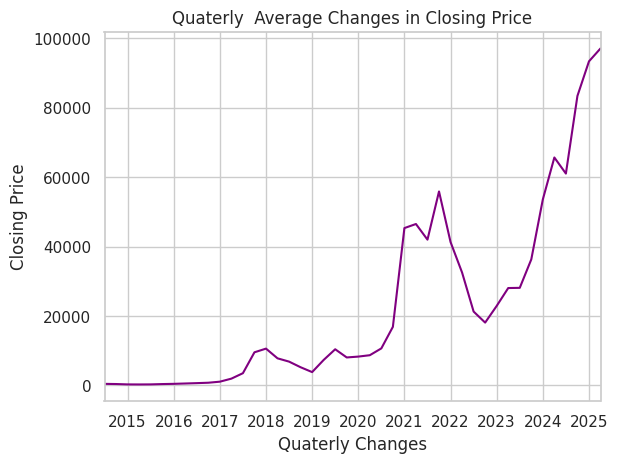

In [60]:
# EDA Analysis on Quaterly average changes in closing price

df_btc['Close'].resample('Q').mean().plot(color='purple')
plt.xlabel('Quaterly Changes')
plt.ylabel('Closing Price')
plt.title('Quaterly  Average Changes in Closing Price')